###Install VANNA AI Package

In [1]:
# Install Vanna AI package and SQLite
!pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 39.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.2/213.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
  Created wheel for flasgger: filename=flasgger-0.9.7.1-py2.py3-none-any.whl size=3865185 sha256=07e80c7f82b4fbac60590d19cafec522ec18d7e530dc9946387aa5b0cf76ed31
  Stored in directory: /root/.cache/pip/wheels/da/2d/f6/c125d4b8701ac49fdb2abbfb978036c46d5ad64d2ffaa2ac34
Successfully built flasgger


###Mounting Google Drive to connect with the database

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import SQLite to connect with DB and query it

In [3]:
import sqlite3

# Use the correct path to your DB file in Drive
db_path = '/content/drive/MyDrive/Google_Collab/Vanna_AI/World_Data/World_Analysis.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [4]:
#List All Tables in the Database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
country
city
sqlite_sequence
Language


In [5]:
#Check Columns in a Specific Table
table_name = 'city'  # e.g., 'Country'
cursor.execute(f"PRAGMA table_info({table_name});")
columns = cursor.fetchall()

print(f"Columns in {table_name}:")
for col in columns:
    print(col)

Columns in city:
(0, 'ID', 'INTEGER', 0, None, 1)
(1, 'Name', 'TEXT', 1, "''", 0)
(2, 'CountryCode', 'TEXT', 1, "''", 0)
(3, 'District', 'TEXT', 1, "''", 0)
(4, 'Population', 'INTEGER', 1, '0', 0)


In [6]:
#Preview Data from a Table
cursor.execute("SELECT * FROM city LIMIT 5;")
rows = cursor.fetchall()

print("Sample data:")
for row in rows:
    print(row)

Sample data:
(1, 'Kabul', 'AFG', 'Kabol', 1780000)
(2, 'Qandahar', 'AFG', 'Qandahar', 237500)
(3, 'Herat', 'AFG', 'Herat', 186800)
(4, 'Mazar-e-Sharif', 'AFG', 'Balkh', 127800)
(5, 'Amsterdam', 'NLD', 'Noord-Holland', 731200)


In [7]:
# Use Pandas for a Nicer View

import pandas as pd

df = pd.read_sql_query("SELECT * FROM city LIMIT 10", conn)
df.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


Importing Vanna

In [8]:
import vanna as vn
from vanna.remote import VannaDefault

###Get your Vanna AI model and keys from: https://vanna.ai/account/profile

In [9]:
vanna_api_key='ff0f0fdd4d5e4ff6ba12a9d3473df087'
vanna_model_name='world_model'

In [10]:
#api_key = vn.get_api_key('samarthagarwal888@gmail.com')

In [11]:
#vn_model= VannaDefault(model='gpt-3.5-turbo', api_key=Vanna_api_key)
#vn_model= VannaDefault(model='world_model', api_key=Vanna_api_key)
vn_model = VannaDefault(model=vanna_model_name, api_key=vanna_api_key)

In [12]:
vn_model.connect_to_sqlite('/content/drive/MyDrive/Google_Collab/Vanna_AI/World_Data/World_Analysis.db')

#Training Data

In [13]:
#DDL Statements

ddl_statements = [
    """
    CREATE TABLE country (
        Code TEXT NOT NULL PRIMARY KEY,
        Name TEXT NOT NULL DEFAULT '',
        Continent TEXT NOT NULL DEFAULT 'Asia',
        Region TEXT NOT NULL DEFAULT '',
        SurfaceArea REAL NOT NULL DEFAULT 0.00,
        IndepYear INTEGER DEFAULT NULL,
        Population INTEGER NOT NULL DEFAULT 0,
        LifeExpectancy REAL DEFAULT NULL,
        GNP REAL DEFAULT NULL,
        GNPOld REAL DEFAULT NULL,
        LocalName TEXT NOT NULL DEFAULT '',
        GovernmentForm TEXT NOT NULL DEFAULT '',
        HeadOfState TEXT DEFAULT NULL,
        Capital INTEGER DEFAULT NULL,
        Code2 TEXT NOT NULL DEFAULT ''
    );
    """,
    """
    CREATE TABLE city (
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        Name TEXT NOT NULL DEFAULT '',
        CountryCode TEXT NOT NULL DEFAULT '',
        District TEXT NOT NULL DEFAULT '',
        Population INTEGER NOT NULL DEFAULT 0,
        FOREIGN KEY (CountryCode) REFERENCES country(Code)
    );
    """,
    """
    CREATE TABLE language (
        CountryCode TEXT NOT NULL DEFAULT '',
        Language TEXT NOT NULL DEFAULT '',
        IsOfficial TEXT NOT NULL DEFAULT 'F' CHECK (IsOfficial IN ('T', 'F')),
        Percentage REAL NOT NULL DEFAULT 0.0,
        PRIMARY KEY (CountryCode, Language),
        FOREIGN KEY (CountryCode) REFERENCES country(Code)
    );
    """,
    """
    CREATE INDEX idx_language_countrycode ON language(CountryCode);
    """,
    """
    CREATE INDEX idx_city_countrycode ON city(CountryCode);
    """
]

In [14]:
# Step 4: Documentation: Define natural language schema descriptions
schema_descriptions = [
    "The database contains three main tables: country, city, and language. These tables are related to each other by foreign keys.",

    "The 'country' table stores information about each country. It includes columns like Code (the unique identifier), Name, Continent, Region, SurfaceArea, Independence Year, Population, Life Expectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, and Code2. The 'Code' column is the primary key.",

    "The 'city' table contains data about cities. Each city has an ID (primary key), a Name, CountryCode, District, and Population. The 'CountryCode' in the city table is a foreign key referencing the 'Code' in the country table, indicating which country the city belongs to.",

    "The 'language' table represents the languages spoken in each country. Each row includes a CountryCode, Language, a flag indicating whether the language is official (IsOfficial), and the percentage of the population that speaks it. The primary key is a combination of CountryCode and Language. CountryCode is a foreign key referencing the country table.",

    "Each country can have multiple cities, and each country can have multiple languages. Languages can be either official or unofficial depending on the value of the IsOfficial column.",

    "The 'IsOfficial' field in the language table only accepts 'T' for true and 'F' for false. It tells whether a language is an official language of the country.",

    "The 'Capital' column in the country table refers to the ID of a city from the city table. This links each country optionally to a single city that serves as its capital."
]

In [15]:
# Step 5: Define question-to-SQL training pairs

Question_SQL_Pairs = [
    {
        "question": "What is the population of India?",
        "sql": "SELECT Population FROM country WHERE Name = 'India';"
    },
    {
        "question": "List all cities in Australia.",
        "sql": "SELECT Name FROM city WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'Australia');"
    },
    {
        "question": "Which countries are in Asia?",
        "sql": "SELECT Name FROM country WHERE Continent = 'Asia';"
    },
    {
        "question": "What is the total population of all cities in the Afghanistan?",
        "sql": "SELECT SUM(Population) FROM city WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'Afghanistan');"
    },
    {
        "question": "List official languages spoken in Germany.",
        "sql": "SELECT Language FROM language WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'Germany') AND IsOfficial = 'T';"
    },
    {
        "question": "Which country has the highest GNP?",
        "sql": "SELECT Name FROM country WHERE GNP = (SELECT MAX(GNP) FROM country);"
    },
    {
        "question": "List the top 5 most populous countries.",
        "sql": "SELECT Name, Population FROM country ORDER BY Population DESC LIMIT 5;"
    },
    {
        "question": "What is the average life expectancy by continent?",
        "sql": "SELECT Continent, AVG(LifeExpectancy) as AvgLife FROM country WHERE LifeExpectancy IS NOT NULL GROUP BY Continent;"
    },
    {
        "question": "How many cities are there in each country?",
        "sql": "SELECT CountryCode, COUNT(*) as CityCount FROM city GROUP BY CountryCode;"
    },
    {
        "question": "What are the top 3 most spoken languages by percentage in India?",
        "sql": "SELECT Language, Percentage FROM Language WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'India') ORDER BY Percentage DESC LIMIT 3;"
    }
]

In [15]:
# Train on DDL statements
for query in ddl_statements:
  vn_model.train(ddl=query)

Adding ddl: 
    CREATE TABLE country (
        Code TEXT NOT NULL PRIMARY KEY,
        Name TEXT NOT NULL DEFAULT '',
        Continent TEXT NOT NULL DEFAULT 'Asia',
        Region TEXT NOT NULL DEFAULT '',
        SurfaceArea REAL NOT NULL DEFAULT 0.00,
        IndepYear INTEGER DEFAULT NULL,
        Population INTEGER NOT NULL DEFAULT 0,
        LifeExpectancy REAL DEFAULT NULL,
        GNP REAL DEFAULT NULL,
        GNPOld REAL DEFAULT NULL,
        LocalName TEXT NOT NULL DEFAULT '',
        GovernmentForm TEXT NOT NULL DEFAULT '',
        HeadOfState TEXT DEFAULT NULL,
        Capital INTEGER DEFAULT NULL,
        Code2 TEXT NOT NULL DEFAULT ''
    );
    
Adding ddl: 
    CREATE TABLE city (
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        Name TEXT NOT NULL DEFAULT '',
        CountryCode TEXT NOT NULL DEFAULT '',
        District TEXT NOT NULL DEFAULT '',
        Population INTEGER NOT NULL DEFAULT 0,
        FOREIGN KEY (CountryCode) REFERENCES country(Code)
    );
    


In [16]:
#Train on Documentation
vn_model.train(documentation=schema_descriptions)

Adding documentation....


'3394921-doc'

In [17]:
#Train on Question-SQL pairs
for pair in Question_SQL_Pairs:
    question_with_quotes = f'"{pair["question"]}"'  # Add double quotes around the question
    sql_with_quotes = f'"{pair["sql"]}"'  # Add double quotes around the SQL query
    vn_model.train(question=question_with_quotes, sql=sql_with_quotes)
    #print(question_with_quotes)  # This will print the question in double quotes
    #print(sql_with_quotes)  # This will print the SQL in double quotes
    #print()


In [18]:
for pair in Question_SQL_Pairs:
    print(pair['question'])
    print(pair['sql'])
    print()


What is the population of India?
SELECT Population FROM country WHERE Name = 'India';

List all cities in Australia.
SELECT Name FROM city WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'Australia');

Which countries are in Asia?
SELECT Name FROM country WHERE Continent = 'Asia';

What is the total population of all cities in the Afghanistan?
SELECT SUM(Population) FROM city WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'Afghanistan');

List official languages spoken in Germany.
SELECT Language FROM language WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'Germany') AND IsOfficial = 'T';

Which country has the highest GNP?
SELECT Name FROM country WHERE GNP = (SELECT MAX(GNP) FROM country);

List the top 5 most populous countries.
SELECT Name, Population FROM country ORDER BY Population DESC LIMIT 5;

What is the average life expectancy by continent?
SELECT Continent, AVG(LifeExpectancy) as AvgLife FROM country WHERE LifeExpectancy IS NOT NULL GROUP 

In [16]:
vn_model.get_training_data()

,id,training_data_type,question,content
0,1099937-sql,sql,Show me top 3 continents with maximum capital,"SELECT Continent, COUNT(Capital) as CapitalCou..."
1,1099936-sql,sql,List top 5 countries with the minimum LIfe Exp...,"SELECT Name, LifeExpectancy FROM country WHERE..."
2,9433423-ddl,ddl,None,\n CREATE INDEX idx_language_countrycode ON...
3,9433426-ddl,ddl,None,\n CREATE INDEX idx_city_countrycode ON cit...
4,1099924-sql,sql,"""What is the population of India?""","""SELECT Population FROM country WHERE Name = '..."
5,1099929-sql,sql,"""Which country has the highest GNP?""","""SELECT Name FROM country WHERE GNP = (SELECT ..."
6,9433415-ddl,ddl,None,\n CREATE TABLE country (\n Code TEX...
7,1099930-sql,sql,"""List the top 5 most populous countries.""","""SELECT Name, Population FROM country ORDER BY..."
8,9433420-ddl,ddl,None,\n CREATE TABLE language (\n Country...
9,3394921-doc,documentation,None,"{""The database contains three main tables: cou..."


###Saving Final Training Data in Google Drive

In [17]:
import numpy as np
import pandas as pd

In [20]:
# Get the training data from the model
training_data = vn_model.get_training_data()

# Convert the training data into a pandas DataFrame
df = pd.DataFrame(training_data)

# Save the DataFrame to an Excel file
file_path = '/content/drive/MyDrive/Google_Collab/Vanna_AI/World_Data/training_data2.xlsx'
df.to_excel(file_path, index=False)

# Provide the file path to download it
file_path

'/content/drive/MyDrive/Google_Collab/Vanna_AI/World_Data/training_data2.xlsx'

###Questions for the Model

In [37]:
vn_model.generate_sql("Which country have the most populous district, and what is its population?")

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE city (\n        ID INTEGER PRIMARY KEY AUTOINCREMENT,\n        Name TEXT NOT NULL DEFAULT \'\',\n        CountryCode TEXT NOT NULL DEFAULT \'\',\n        District TEXT NOT NULL DEFAULT \'\',\n        Population INTEGER NOT NULL DEFAULT 0,\n        FOREIGN KEY (CountryCode) REFERENCES country(Code)\n    );\n    \n\n\n    CREATE TABLE country (\n        Code TEXT NOT NULL PRIMARY KEY,\n        Name TEXT NOT NULL DEFAULT \'\',\n        Continent TEXT NOT NULL DEFAULT \'Asia\',\n        Region TEXT NOT NULL DEFAULT \'\',\n        SurfaceArea REAL NOT NULL DEFAULT 0.00,\n        IndepYear INTEGER DEFAULT NULL,\n        Population INTEGER NOT NULL DEFAULT 0,\n        LifeExpectancy REAL DEFAULT NULL,\n        GNP REAL 

'SELECT District, Population FROM city WHERE Population = (SELECT MAX(Population) FROM city);'

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE country (\n        Code TEXT NOT NULL PRIMARY KEY,\n        Name TEXT NOT NULL DEFAULT \'\',\n        Continent TEXT NOT NULL DEFAULT \'Asia\',\n        Region TEXT NOT NULL DEFAULT \'\',\n        SurfaceArea REAL NOT NULL DEFAULT 0.00,\n        IndepYear INTEGER DEFAULT NULL,\n        Population INTEGER NOT NULL DEFAULT 0,\n        LifeExpectancy REAL DEFAULT NULL,\n        GNP REAL DEFAULT NULL,\n        GNPOld REAL DEFAULT NULL,\n        LocalName TEXT NOT NULL DEFAULT \'\',\n        GovernmentForm TEXT NOT NULL DEFAULT \'\',\n        HeadOfState TEXT DEFAULT NULL,\n        Capital INTEGER DEFAULT NULL,\n        Code2 TEXT NOT NULL DEFAULT \'\'\n    );\n    \n\n\n    CREATE INDEX idx_language_countrycode ON la

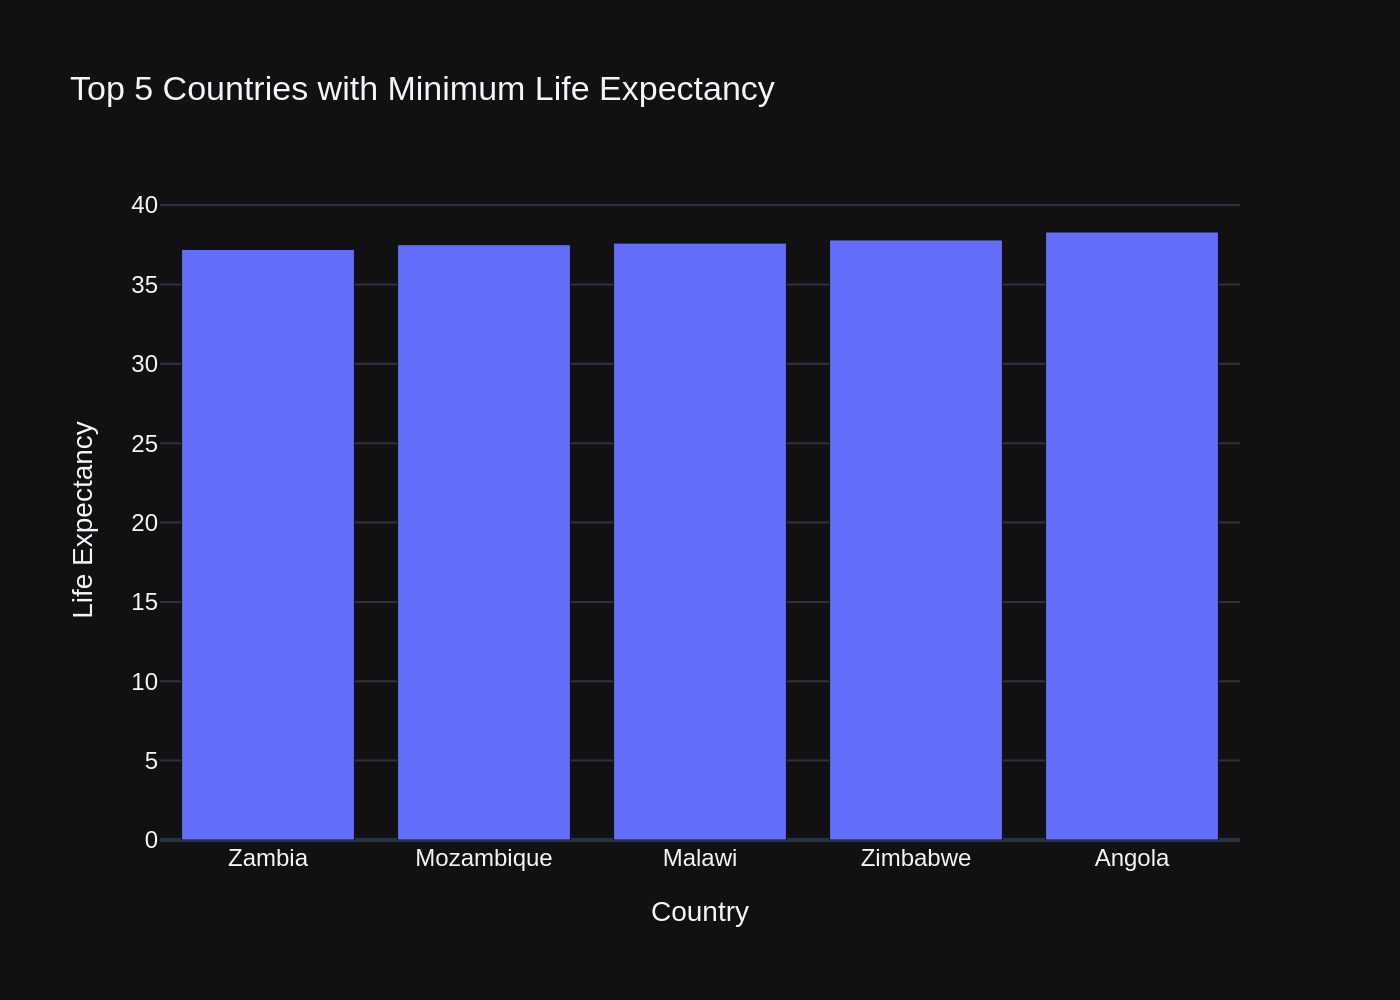

('SELECT Name, LifeExpectancy FROM country WHERE LifeExpectancy IS NOT NULL ORDER BY LifeExpectancy ASC LIMIT 5;',
          Name  LifeExpectancy
 0      Zambia            37.2
 1  Mozambique            37.5
 2      Malawi            37.6
 3    Zimbabwe            37.8
 4      Angola            38.3,
 Figure({
     'data': [{'type': 'bar',
               'x': array(['Zambia', 'Mozambique', 'Malawi', 'Zimbabwe', 'Angola'], dtype=object),
               'y': array([37.2, 37.5, 37.6, 37.8, 38.3])}],
     'layout': {'template': '...',
                'title': {'text': 'Top 5 Countries with Minimum Life Expectancy'},
                'xaxis': {'title': {'text': 'Country'}},
                'yaxis': {'title': {'text': 'Life Expectancy'}}}
 }))

In [38]:
vn_model.ask("List top 5 countries with the minimum LIfe Expectancy")

In [18]:
vn_model.generate_sql("What is the official language of the country India")

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE language (\n        CountryCode TEXT NOT NULL DEFAULT \'\',\n        Language TEXT NOT NULL DEFAULT \'\',\n        IsOfficial TEXT NOT NULL DEFAULT \'F\' CHECK (IsOfficial IN (\'T\', \'F\')),\n        Percentage REAL NOT NULL DEFAULT 0.0,\n        PRIMARY KEY (CountryCode, Language),\n        FOREIGN KEY (CountryCode) REFERENCES country(Code)\n    );\n    \n\n\n    CREATE INDEX idx_language_countrycode ON language(CountryCode);\n    \n\n\n    CREATE TABLE country (\n        Code TEXT NOT NULL PRIMARY KEY,\n        Name TEXT NOT NULL DEFAULT \'\',\n        Continent TEXT NOT NULL DEFAULT \'Asia\',\n        Region TEXT NOT NULL DEFAULT \'\',\n        SurfaceArea REAL NOT NULL DEFAULT 0.00,\n        IndepYear INTEGE

"SELECT Language FROM language WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'India') AND IsOfficial = 'T';"

In [40]:
vn_model.run_sql("SELECT Language FROM language WHERE CountryCode = (SELECT Code FROM country WHERE Name = 'India') AND IsOfficial = 'T';")

,Language
0,Hindi


SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE country (\n        Code TEXT NOT NULL PRIMARY KEY,\n        Name TEXT NOT NULL DEFAULT \'\',\n        Continent TEXT NOT NULL DEFAULT \'Asia\',\n        Region TEXT NOT NULL DEFAULT \'\',\n        SurfaceArea REAL NOT NULL DEFAULT 0.00,\n        IndepYear INTEGER DEFAULT NULL,\n        Population INTEGER NOT NULL DEFAULT 0,\n        LifeExpectancy REAL DEFAULT NULL,\n        GNP REAL DEFAULT NULL,\n        GNPOld REAL DEFAULT NULL,\n        LocalName TEXT NOT NULL DEFAULT \'\',\n        GovernmentForm TEXT NOT NULL DEFAULT \'\',\n        HeadOfState TEXT DEFAULT NULL,\n        Capital INTEGER DEFAULT NULL,\n        Code2 TEXT NOT NULL DEFAULT \'\'\n    );\n    \n\n\n    CREATE INDEX idx_city_countrycode ON city(C

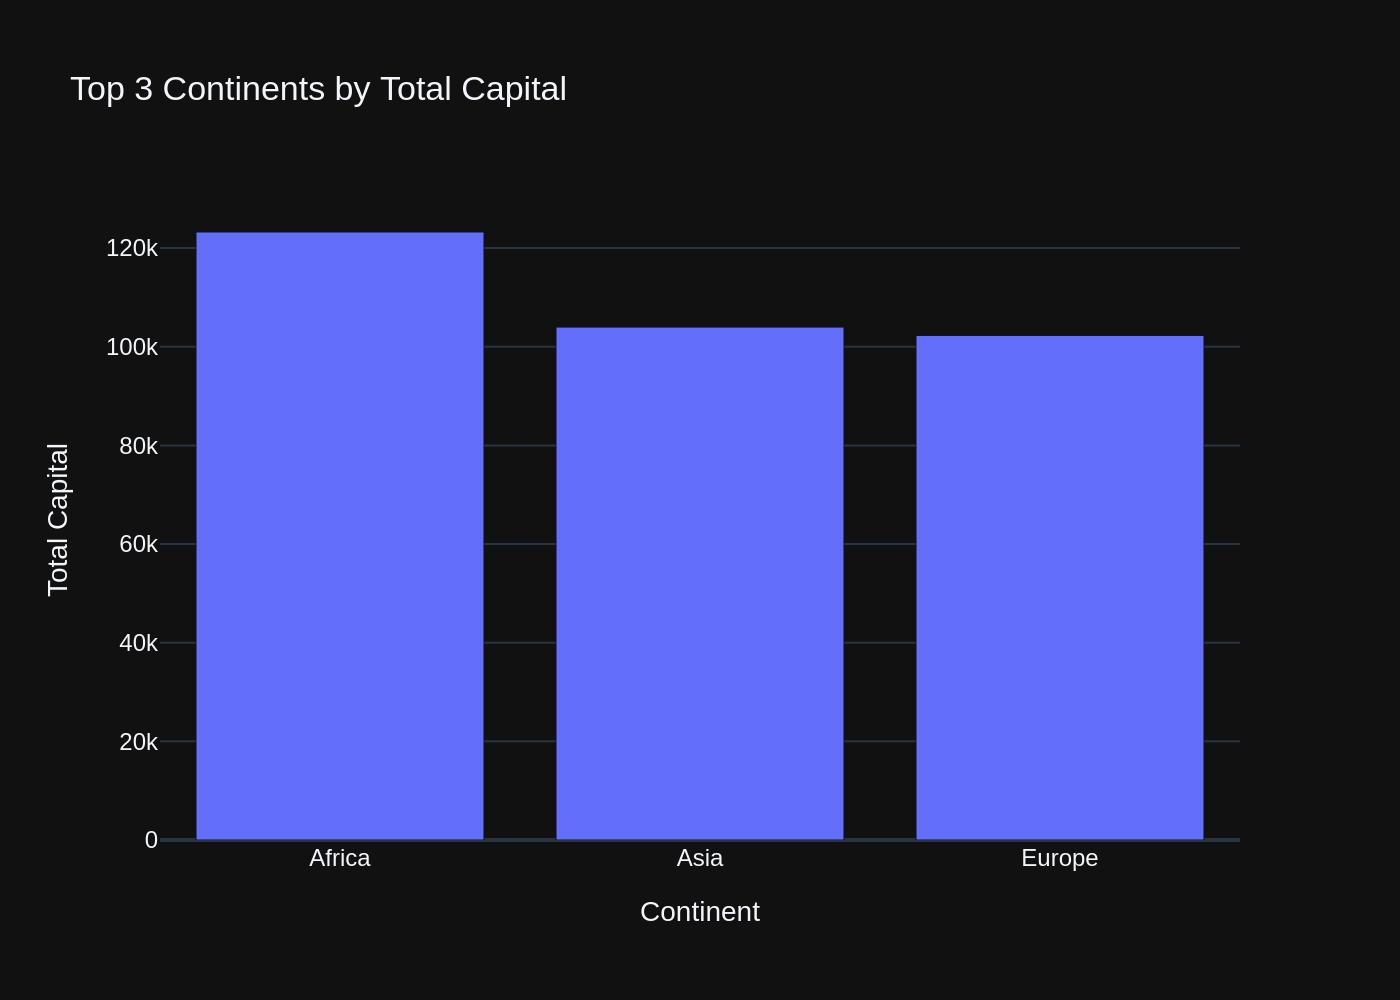

('SELECT Continent, SUM(Capital) as TotalCapital FROM country WHERE Capital IS NOT NULL GROUP BY Continent ORDER BY TotalCapital DESC LIMIT 3;',
   Continent  TotalCapital
 0    Africa      123255.0
 1      Asia      103979.0
 2    Europe      102294.0,
 Figure({
     'data': [{'type': 'bar',
               'x': array(['Africa', 'Asia', 'Europe'], dtype=object),
               'y': array([123255., 103979., 102294.])}],
     'layout': {'template': '...',
                'title': {'text': 'Top 3 Continents by Total Capital'},
                'xaxis': {'title': {'text': 'Continent'}},
                'yaxis': {'title': {'text': 'Total Capital'}}}
 }))

In [44]:
vn_model.ask("Show me top 3 continents with maximum sum of capital")

In [19]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn_model)
app.run()

Google Colab doesn't support running websocket servers. Disabling debug mode.
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

Your app is running at:
https://8084-m-s-3ikerxg6nqmik-c.us-east1-1.prod.colab.dev
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
Info: None
None
SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE country (\n        Code TEXT NOT NULL PRIMARY KEY,\n        Name TEXT NOT NULL DEFAULT \'\',\n        Continent TEXT NOT NULL DEFAULT \'Asia\',\n        Region TEXT NOT NULL DEFAULT \'\',\n        SurfaceArea REAL NOT NULL DEFAULT 0.00,\n        IndepYear INTEGER DEFAULT NULL,\n        Population INTEGER NOT NULL DEFAULT 0,\n        LifeExpectancy REAL DEFAULT NULL,\n        GNP REAL DEFAULT NULL,\n        GNPOld REAL DEFAULT NULL,\n        LocalName TEXT NOT NULL DEFAULT \'\',\n        GovernmentForm TEXT NOT NULL DEFAULT \'\',\n        HeadOfState TEXT DEFAULT 